In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("./EURUSD=X.csv")

In [21]:
data["Date"] = pd.to_datetime(data.Date)

In [22]:
data.set_index("Date",inplace=True)

In [23]:
sampled_data = data[["Adj Close"]].resample("M").last()

In [24]:
sampled_data

,Adj Close
Date,
2021-04-30,1.212709
2021-05-31,1.219007
2021-06-30,1.190193
2021-07-31,1.189300
2021-08-31,1.179690
2021-09-30,1.160160
2021-10-31,1.168361
2021-11-30,1.129344
2021-12-31,1.132503


In [151]:
np.set_printoptions(precision=2, suppress=True)
start = -2
end=2
n=8
wf = lambda n: np.exp(-1j*2*np.pi/n)
t = np.linspace(start,end,n)

T = 0.1984
f = lambda t : np.exp(-np.abs(t)/T)
ft = f(t)

# 0. Get the value of w
w = wf(n)


In [152]:
def performDFT(x,n):
    DFT = np.zeros((n,n),dtype = np.complex)

    for i in range(n):
        for j in range(n):
            DFT[i, j] = w ** (i * j)
    
    DFT =  DFT
    DFT_x =  np.dot(DFT, x)

    return DFT_x, DFT

In [153]:
def performFFT(x,n):
    Fn = computeFn(n)
    return Fn @ x, Fn


def computeFn(n):
    """
    We will use the matrix form of multiplication
    :param n:
    :param x:
    :return:
    """
    if n == 1:
        return np.array([[1]])

    # 1. Get the D matrix of size n = 2^m/2
    Dn_2 = np.diag(np.power(w,np.arange(0,n//2)))

    # 2. Get the transpose matrix to align the odd and even terms
    Pn_2 = np.zeros((n, n))
    Pn_2[np.arange(0, n // 2), np.arange(0, n, 2)] = 1
    Pn_2[np.arange(n // 2, n), np.arange(1, n, 2)] = 1

    # 3. Get the identity matrix of size n
    In_2 = np.eye(n // 2)

    # 4. Compute the Fn
    Fn_2 = computeFn(n//2)

    Fn = np.block([[In_2,Dn_2],[In_2,-Dn_2]]) @ np.block([[Fn_2,np.zeros((n//2,n//2))],[np.zeros((n//2,n//2)),Fn_2]]) @ Pn_2
#     print("first",np.block([[In_2,Dn_2],[In_2,-Dn_2]]))
#     print("second",np.block([[Fn_2,np.zeros((n//2,n//2))],[np.zeros((n//2,n//2)),Fn_2]]))
#     print("P",Pn_2)
    
    
    return Fn

In [154]:
first,DFT = performDFT(ft,n)

In [155]:
np.real(DFT)

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  0.71,  0.  , -0.71, -1.  , -0.71, -0.  ,  0.71],
       [ 1.  ,  0.  , -1.  , -0.  ,  1.  ,  0.  , -1.  , -0.  ],
       [ 1.  , -0.71, -0.  ,  0.71, -1.  ,  0.71,  0.  , -0.71],
       [ 1.  , -1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  , -1.  ],
       [ 1.  , -0.71,  0.  ,  0.71, -1.  ,  0.71, -0.  , -0.71],
       [ 1.  , -0.  , -1.  ,  0.  ,  1.  , -0.  , -1.  ,  0.  ],
       [ 1.  ,  0.71, -0.  , -0.71, -1.  , -0.71,  0.  ,  0.71]])

In [156]:
np.real(computeFn(n))

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  0.71,  0.71,  0.  , -1.  , -0.71, -0.71,  0.  ],
       [ 1.  ,  0.  , -1.  ,  0.  ,  1.  ,  0.  , -1.  ,  0.  ],
       [ 1.  , -0.71, -0.71,  1.  , -1.  ,  0.71,  0.71, -1.  ],
       [ 1.  , -1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  , -1.  ],
       [ 1.  , -0.71,  0.71,  0.  , -1.  ,  0.71, -0.71,  0.  ],
       [ 1.  ,  0.  , -1.  ,  0.  ,  1.  ,  0.  , -1.  ,  0.  ],
       [ 1.  ,  0.71, -0.71, -1.  , -1.  , -0.71,  0.71,  1.  ]])

In [160]:
from scipy.linalg import dft
from scipy.fft import fft

In [159]:
np.real(dft(8))

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  0.71,  0.  , -0.71, -1.  , -0.71, -0.  ,  0.71],
       [ 1.  ,  0.  , -1.  , -0.  ,  1.  ,  0.  , -1.  , -0.  ],
       [ 1.  , -0.71, -0.  ,  0.71, -1.  ,  0.71,  0.  , -0.71],
       [ 1.  , -1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  , -1.  ],
       [ 1.  , -0.71,  0.  ,  0.71, -1.  ,  0.71, -0.  , -0.71],
       [ 1.  , -0.  , -1.  ,  0.  ,  1.  , -0.  , -1.  ,  0.  ],
       [ 1.  ,  0.71, -0.  , -0.71, -1.  , -0.71,  0.  ,  0.71]])

In [161]:
np.real(fft(np.exp(2j*np.pi*np.arange(n)/n),norm="ortho"))

array([-0.  ,  2.83,  0.  ,  0.  ,  0.  , -0.  , -0.  ,  0.  ])

In [16]:
n1 = np.array([1,2,3])
n1 = n1.reshape(3,1)
print(n1)

[[1]
 [2]
 [3]]


In [19]:
n2 = np.array([1,2,3])
n1*n2

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

frq [[0.0000e+00]
 [2.5000e-01]
 [5.0000e-01]
 ...
 [2.5525e+02]
 [2.5550e+02]
 [2.5575e+02]]
X [0.38800018 0.35505568 0.28291543 ... 0.21137584 0.28291543 0.35505568]
w1 [[-802.67692299]
 [-801.10612667]
 [-799.53533034]
 ...
 [ 799.53533034]
 [ 801.10612667]
 [ 802.67692299]]
f1 [3.93271278e-05 3.93256173e-05 3.93300890e-05 ... 3.93300890e-05
 3.93256173e-05 3.93271278e-05]
f2 [0.09700004 0.08876392 0.07072886 ... 0.05284396 0.07072886 0.08876392]


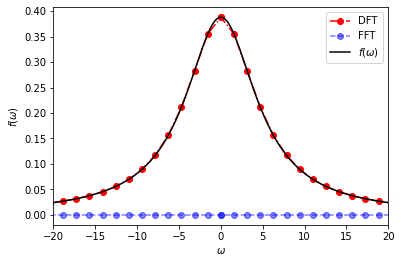

In [31]:
ts = 4/1024 # step
sr = 1024/4 # sampling rate
T0 = 0.194
f = lambda t: np.exp(-np.abs(t)/T0)
N = 1024
dt = 4/N
t = np.arange(-2,2,dt)
x = f(t)
# (1) dft
xf = np.zeros(N)
n = np.arange(N)
k = n.reshape((N, 1))
e = np.exp(-2j * np.pi * k * n/N)
X = np.dot(e, x)

# plt
frq = k/4 # two sides frequency range
print("frq",frq)

X = np.abs(X)/sr
print("X",X) 
# get w1,f1
w1 = np.vstack((-frq[N//2-1::-1],frq[:N//2]))*np.pi*2
print("w1",w1)

f1 = np.hstack((X[N//2-1::-1],X[:N//2]))
print("f1",f1)

# (2) fft
xf = np.fft.fft(x) / N # un normalaization
# xf = np.fft.fft(xf) # fft computing and normalization
w2 = w1
f2 = abs(xf)
print("f2",f2)

# (3) plot
plt.figure(1)
plt.plot(w1,f1,'o-.',label = 'DFT',color = 'red')
plt.plot(w2,f2,'o--',label = 'FFT',color = 'blue',alpha = 0.5)
ww = np.linspace(-20,20,10000)
plt.plot(ww,2*T0/(1+(ww*T0)**2),label = '$f(\omega)$',color ='black')
plt.legend()
plt.xlabel('$\omega$')
plt.xlim([-20,20])
plt.ylabel('$f(\omega)$')
plt.show()